<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [ ]:
#라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np

In [ ]:
#폰트를 선명하게 하기 위함
set_matplotlib_formats('svg')
#그래프가 잘보이기 위한 스타일 지정
plt.style.use('ggplot')

###Relational plots - 관계형 플롯
###[Scatter plot - 산점도](https://ko.wikipedia.org/wiki/%EC%82%B0%EC%A0%90%EB%8F%84)
- 두 변수간의 관계를 나타낼 수 있는 그래프 타입
- 선형, 비선형 모델을 확인할수 있음
- 이상치를 알 수 있음
  - 이상치(이상점) :  실험 또는 관찰을 통하여 데이터를 수집하였을 때, 데이터의 전반적인 흐름에서 벗어나는 관측점이다.

####scatterplot 실습에 사용할 데이터
- tips

In [ ]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [ ]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


###그래프 그리기

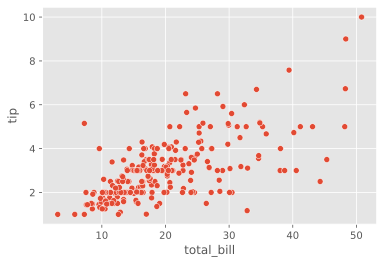

In [ ]:
#x='total_bill', y='tip' 의 상관관계
scatterplot= sns.scatterplot(data=tips, x='total_bill', y='tip')

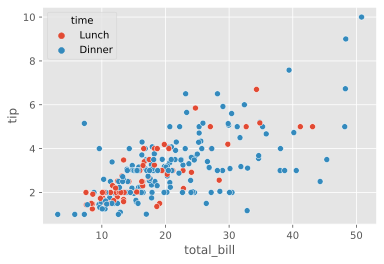

In [ ]:
#hue 옵션의 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

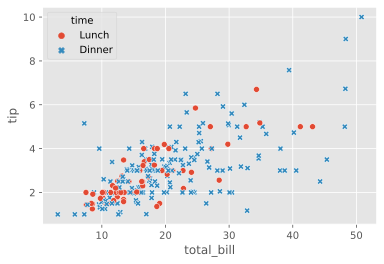

In [ ]:
#hue 옵션으로 time, style 옵션에 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')

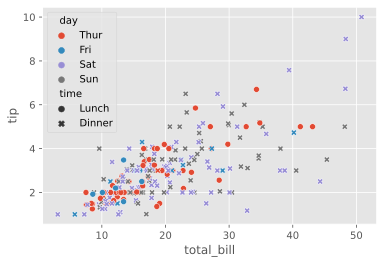

In [ ]:
#x='total_bill', y='tip' 의 상관관계
#hue 옵션으로 day, style 옵션에 time 적용
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='day',style='time')

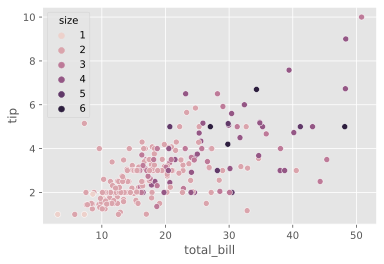

In [ ]:
#hue옵션으로 size를 지정
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

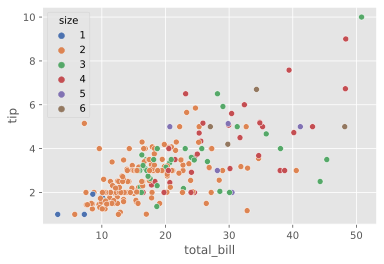

In [ ]:
#palette에 deep값을 지정
#palette를 변경하면 테마를 변경할 수 있다.
scatterplot = sns.scatterplot(data=tips,x='total_bill',y='tip',hue='size',palette='deep')

pd.eval() 옵션을 사용하는 방법과 사용하지 않는 방법.

float64


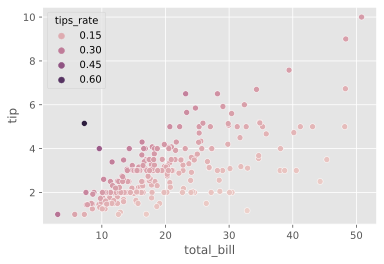

In [ ]:
#tips_rate 특성을 만들어내고 hue옵션에 사용
tips['tips_rate'] = tips.eval('tip/total_bill')
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')

float64


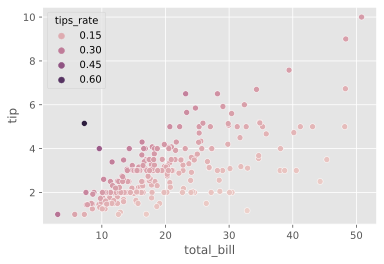

In [ ]:
#tips_rate 특성을 만들어내고 hue옵션에 사용
tips_rate = tips.eval('tip/total_bill').rename('tip_rate')
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')

float64


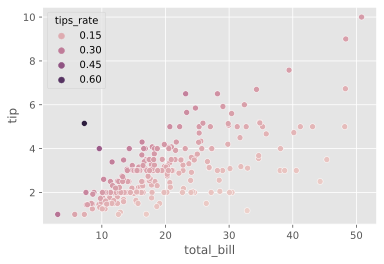

In [ ]:
#tips_rate 특성을 만들어내고 hue옵션에 사용
tips['tips_rate'] =  tips['tip'] / tips['total_bill']
print(tips['tips_rate'].dtype)
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='tips_rate')

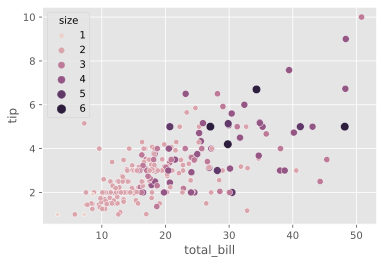

In [ ]:
#size옵션을 사용
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='size',size='size')

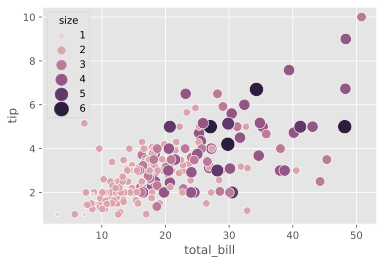

In [ ]:
#sizes옵션을 사용
#legend= 'full' 옵션은 모든 그룹의 범례에 항목이 표시
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',hue='size',size='size',sizes=(20,200),legend='full')

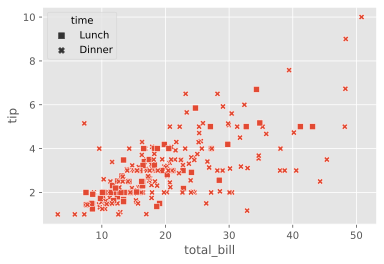

In [ ]:
#markers를 지정하여 산점도에 표시되는 마커의 이미지를 변경
#'s' 옵션은 정사각형, 'X'는 X표시
markers={'Lunch':'s','Dinner':"X"}
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',style='time',markers=markers)

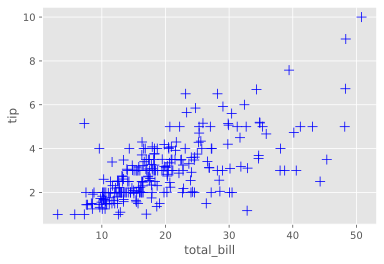

In [ ]:
#s 옵션은 마커의 사이즈 를 의미
#color는 마커의 색상 변경
scatterplot = sns.scatterplot(data=tips, x='total_bill',y='tip',marker="+",s=100,color='blue')

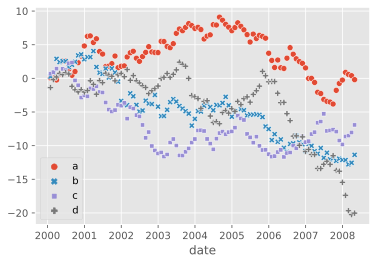

In [ ]:
#이전에 예들은 scatterplot()에 직접 옵션을 부여했지만 아래의 예는 wide_df에 맵핑을 하게 되면 자동으로 그래프를 표현하게된다.

#pd.data_range 함수는 start 부터 datetime타입으로 1차원 배열을 만들어 주는것
#periods 는 갯수를 의미 
#freq='m'은 해당 달의 마지막 날을 의미
index = pd.date_range("1 1 2000", periods=100, freq='m', name='date')
#np.random.randn 난수를 만드는 함수
#100,4 는 행 = 100, 열 = 4
data = np.random.randn(100,4).cumsum(axis=0)
wide_df = pd.DataFrame(data=data, index=index ,columns=['a','b','c','d'])
scatterplot = sns.scatterplot(data=wide_df)